# Applied Mechanisms and Big Data
### Assignment 1: wifi
##### Ysbrand Galama, 10262067
##### Koen Keune, 10003527



## 0.1

In [1]:
%pylab inline
random.seed(1)

Populating the interactive namespace from numpy and matplotlib


## 0.2

$ P_r = P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f r} \right) $

### a

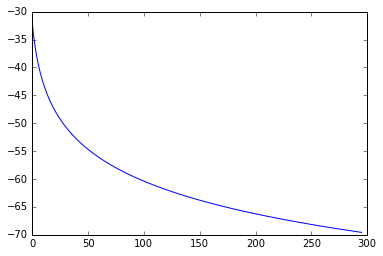

In [2]:
Pt,c,f = 0, 299792458, 2.4e9

r = arange(0.4,30,0.1)

Pr = Pt + 20 * log10( c / ( 4*pi*f*r) )

plot(Pr)

### b

\begin{align}
P_r &= P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f r} \right) \\
\frac{P_r - P_t} { 20} &= ^{10}\log \left( \frac{c}{4\pi f r} \right) \\
10 ^ { \frac{P_r - P_t} { 20} } &= \frac{c}{4\pi f r} \\
10 ^ { \frac{P_r - P_t} { 20} } \frac{4\pi f}{c} &= \frac{1}{r} \\
r &= \frac{c}{4\pi f} 10^{ (P_t - P_r) / -20}
\end{align}

### c

In [3]:
def friis_i(Pr,Pt=0):
    return c/(4*pi*f) * 10**((Pt - Pr)/-20)

print( friis_i(-30) - friis_i(-31) )

print( friis_i(-60) - friis_i(-61) )

3.4184176042559257e-05
1.0809985623064794e-06


### d
As seen from the results of (c), the more negative the signal strength, the smaller the error becomes. This is intuatively correct, as the result of $P_t-P_r$ becomes larger, ten to the power of negative this number becomes a smaller number. It can also be seen from the plot of (a), as the slope gets flatter, the bigger the distance.

## 0.3
### e

As seen in this plot, the circles don't actually overlap on the
means, however, the overlap will be somewhere inside the margins of the uncertenties


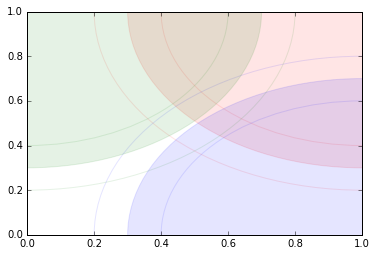

In [4]:
# 3 points with ( (x,y), distance, uncertanty, colour)
ps = [ ( (1,1), 0.7, 0.1, 'r'), ( (1,0), 0.7, 0.1, 'b'), ( (0,1), 0.7, 0.1, 'g') ]

ax = gcf().gca()
for p in ps:
    ax.add_artist(Circle( p[0], p[1], color=p[3], alpha=0.1))
    ax.add_artist(Circle( p[0], p[1]-p[2], color=p[3], alpha=0.1, fill=False))
    ax.add_artist(Circle( p[0], p[1]+p[2], color=p[3], alpha=0.1, fill=False))

print("As seen in this plot, the circles don't actually overlap on the\n\
means, however, the overlap will be somewhere inside the margins of the uncertenties")

### f

\begin{align}
P_r^i(x,y) &= P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f r} \right) \\
&= P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f} \right) + 20 \times ^{10}\log \frac1r \\
&= P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f} \right) + 20 \times ^{10}\log \frac1r \\
&= P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f} \right) - 20 \times ^{10}\log r \\
&= P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f} \right) - 20 \times ^{10}\log \sqrt{ (x-x_i)^2 + (y-y_i)^2 + Z^2) } \\
&= P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f} \right) - 10 \times ^{10}\log \left( (x-x_i)^2 + (y-y_i)^2 + Z^2) \right) 
\end{align}

### g

The shown distribution has a mean of ~0 and a std of ~1


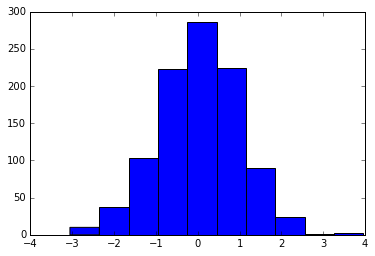

In [5]:
Z = 2
x,y = 20,0
xi,yi = 0,0
Pt = 0

packets = Pt+20*log10(c/(4*pi*f)) - 10 * log10( (x-xi)**2 + (y-yi)**2 + Z**2) + random.normal(0,1,1000)
expect = Pt+20*log10(c/(4*pi*f)) - 10 * log10( (x-xi)**2 + (y-yi)**2 + Z**2)

ax = hist( (packets - expect) / 1 )

print( "The shown distribution has a mean of ~0 and a std of ~1")

Underestimating the noise increases the std of the pull distribution.
 Overestimating on the contrairy reduces the std. Mean stays the same in both occations


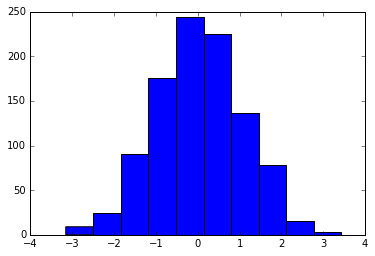

In [6]:
##h

packets = Pt+20*log10(c/(4*pi*f)) - 10 * log10( (x-xi)**2 + (y-yi)**2 + Z**2) + random.normal(0,1,1000)
expect = Pt+20*log10(c/(4*pi*f)) - 10 * log10( (x-xi)**2 + (y-yi)**2 + Z**2)

ax = hist( (packets - expect) / 1 )

print( "Underestimating the noise increases the std of the pull distribution.\n \
Overestimating on the contrairy reduces the std. Mean stays the same in both occations")

In this case the mean of the error is no longer zero.


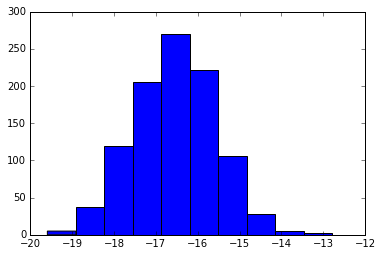

In [7]:
##i

packets = Pt+25*log10(c/(4*pi*f)) - 12.5 * log10( (x-xi)**2 + (y-yi)**2 + Z**2) + random.normal(0,1,1000)
expect = Pt+20*log10(c/(4*pi*f)) - 10 * log10( (x-xi)**2 + (y-yi)**2 + Z**2)

ax = hist( (packets - expect) / 1 )

print( "In this case the mean of the error is no longer zero.")


### j
Seen from these experiments, a pull distribution should have a mean of 0 and a std of your estimated std. Once this is the case, the model is correctly built for the data

## 0.3

### k

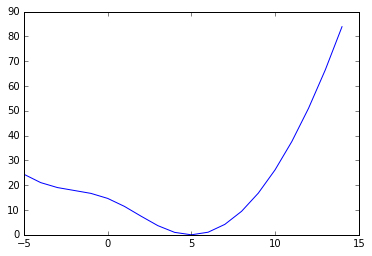

In [57]:
Pt = 0
xi, yi = array([[0, 0, 20, 20]]).T, array([[0, 20, 20, 0]]).T
sig = 1
Z = 3-1
x,y = 5,5

Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 )

def Pri(x,y):
    return Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 )

def chi2(x,y):
    return sum( (Si - Pri(x,y))**2/sig**2, axis=0 )

xrange = atleast_2d(arange(-5,15))
plot(xrange[0], chi2(xrange,5) )

As seen from these four figures with different noise, the minimum in no longer neccesary on
the correct position. It fluctuates slightly around the expected x-value of 5


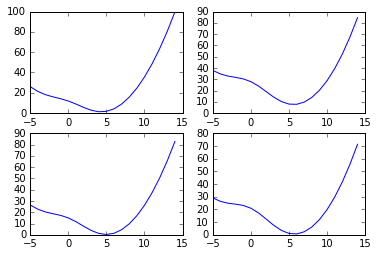

In [59]:
## l

for i in range(1,5):
    subplot(2,2,i)
    Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 ) + random.normal(0,1,xi.shape )

    plot(xrange[0], chi2(xrange,5) )

print("As seen from these four figures with different noise, the minimum in no longer neccesary on\n\
the correct position. It fluctuates slightly around the expected x-value of 5")

In [70]:
## m
from scipy.optimize import minimize as spmin

Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 ) + random.normal(0,1,xi.shape )

print( spmin( chi2, 0, 5 ) )

      fun: 0.7199024226704954
 hess_inv: array([[ 0.4866742]])
      jac: array([  1.31875277e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([ 5.27998167])


[ 4.89211072  4.90287535]
1.95208002521


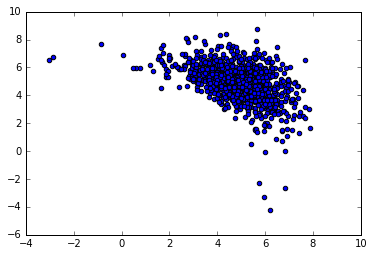

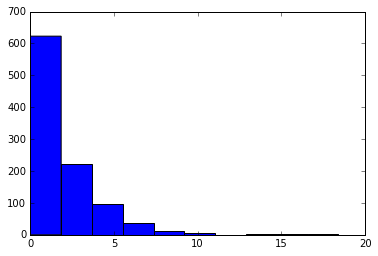

In [93]:
## n

def chi2_p(x):
    return chi2(x[0],x[1])

points = []
chi2mins = []
for i in range(0,1000):
    Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 ) + random.normal(0,1,xi.shape )
    ans = spmin( chi2_p, array([0, 0]) ) 
    points.append( ans.x )
    chi2mins.append( ans.fun )

coords = array(points) 
figure()
scatter(coords[:,0],coords[:,1])
figure()
hist(array(chi2mins))
print(mean(coords,axis=0))
print(mean(array(chi2mins)))

### o

The plot of (n) shows a $\chi^2$ average of ~2, exactly the NDoF.

### p

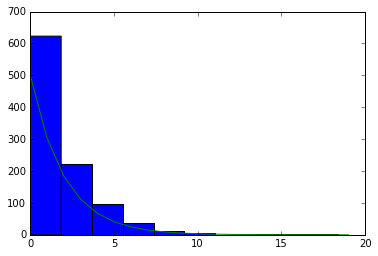

In [101]:
from scipy.stats import chi2 as pchi2

hist(array(chi2mins) )
plot( pchi2.pdf(range(0,20),2) * len(chi2mins), color='g' )

print("As seen in the figure, the histogram of errors follows the pdf")

[ 4.44650434  4.42889428]
7.34542576318
Now the average chi2 is no longer the NDoF, just as that the histogram no longer the curve follows.
The point-cloud is now also more distributed, giving a larger error in the estimation of the coordinates.
This because we now underestimate the error, thus making a small error 'correct'.


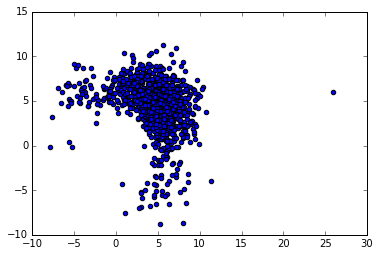

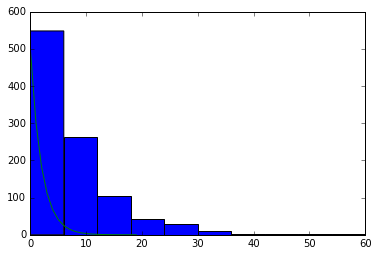

In [103]:
## q

points = []
chi2mins = []
for i in range(0,1000):
    Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 ) + random.normal(0,2,xi.shape )
    ans = spmin( chi2_p, array([0, 0]) ) 
    points.append( ans.x )
    chi2mins.append( ans.fun )

coords = array(points) 
figure()
scatter(coords[:,0],coords[:,1])
figure()
hist(array(chi2mins))
plot( pchi2.pdf(range(0,20),2) * len(chi2mins), color='g' )
print(mean(coords,axis=0))
print(mean(array(chi2mins)))
print("Now the average chi2 is no longer the NDoF, just as that the histogram no longer the curve follows.\n\
The point-cloud is now also more distributed, giving a larger error in the estimation of the coordinates.\n\
This because we now underestimate the error, thus making a small error 'correct'.")

### r

As seen in the above, an std of 1 in stead of 2 made the error bigger with $2^2$. We would expect with ten DoF a $\chi^2$ average minimum of 10, when it is 40, there is probably an estimation error of the std of 2 in stead of 1.


## 0.5

### s
For convenience, $P_r^i(x_0,y_0)$ will be written as $P_r^i$.
\begin{align}
\chi^2 = & \sum_i \frac{(S_i - P_r^i(x,y) )^2}{\sigma_i^2} \\
\approx & \sum_i \frac{1}{\sigma_i^2}\left(S_i - P_r^i - \frac{\partial P_r^i}{\partial x} \times (x-x_0) - \frac{\partial P_r^i}{\partial y} \times (y-y_0) \right)^2 \\
=& \sum_i \frac{1}{\sigma_i^2}\left( 
(S_i - P_r^i)^2 + \left( \frac{\partial P_r^i}{\partial x} (x-x_0) \right)^2 + \left( \frac{\partial P_r^i}{\partial y} (y-y_0) \right)^2 - 2(S_i - P_r^i)\frac{\partial P_r^i}{\partial x}(x-x_0) - 2(S_i - P_r^i)\frac{\partial P_r^i}{\partial y}(y-y_0)
+2 \frac{\partial P_r^i}{\partial x}(x-x_0)\frac{\partial P_r^i}{\partial y}(y-y_0) \right)
\end{align}

### t
\begin{align}
\chi^2 \approx &\\
& \sum_i \frac{1}{\sigma_i^2}\left( 
(S_i - P_r^i)^2 + \left( \frac{\partial P_r^i}{\partial x} (x-x_0) \right)^2 + \left( \frac{\partial P_r^i}{\partial y} (y-y_0) \right)^2 - \underbrace{2(S_i - P_r^i)\frac{\partial P_r^i}{\partial x}(x-x_0)}_{=0} - \underbrace{2(S_i - P_r^i)\frac{\partial P_r^i}{\partial y}(y-y_0)}_{=0}
+2 \frac{\partial P_r^i}{\partial x}(x-x_0)\frac{\partial P_r^i}{\partial y}(y-y_0) \right) \\
=& \sum_i \frac{1}{\sigma_i^2}\left( 
(S_i - P_r^i)^2 + \left( \frac{\partial P_r^i}{\partial x} (x-x_0) \right)^2 + \left( \frac{\partial P_r^i}{\partial y} (y-y_0) \right)^2 +2 \frac{\partial P_r^i}{\partial x}(x-x_0)\frac{\partial P_r^i}{\partial y}(y-y_0) \right)
\end{align}

### u
\begin{align}
\chi^2 \approx &\\
& \sum_i \frac{1}{\sigma_i^2}\left( 
(S_i - P_r^i)^2 + \left( \frac{\partial P_r^i}{\partial x} (x-x_0) \right)^2 + \left( \frac{\partial P_r^i}{\partial y} (y-y_0) \right)^2 +2 \frac{\partial P_r^i}{\partial x}(x-x_0)\frac{\partial P_r^i}{\partial y}(y-y_0) \right) \\
=& \sum_i \frac{1}{\sigma_i^2}\left( 
(S_i - P_r^i)^2 + \left( \frac{\partial P_r^i}{\partial x} \Delta x \right)^2 + \left( \frac{\partial P_r^i}{\partial y} \Delta y \right)^2 +2 \frac{\partial P_r^i}{\partial x}\Delta x\frac{\partial P_r^i}{\partial y}\Delta y \right)
\end{align}


$\chi^2(\Delta x, \Delta y) \approx A + [\Delta x, \Delta y] \cdot \hat{B} \cdot [\Delta x, \Delta y]$

Where $A = S_i - P_r^i(x_0,y_0)$ and $\hat{B}=\left[\begin{array}{cc} \frac{\partial P_r^i(x_0,y_0)}{\partial x} & \frac{\partial P_r^i(x_0,y_0)}{\partial y} \\ \frac{\partial P_r^i(x_0,y_0)}{\partial x} & \frac{\partial P_r^i(x_0,y_0)}{\partial y}\end{array}\right]^T$